In [1]:
# Import the necessary modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics

In [2]:
# Read the csv file, specifying which columns to read
mpg = pd.read_csv('datasets/mpg/mpg.csv', 
                  usecols = ['mpg', 'weight', 'horsepower', 'origin', 'cylinders'])
mpg.head()

,mpg,cylinders,horsepower,weight,origin
0,18.0,8,130,3504,USA
1,15.0,8,165,3693,USA
2,18.0,8,150,3436,USA
3,16.0,8,150,3433,USA
4,17.0,8,140,3449,USA


## Exploratory Data Analysis

In [6]:
# Descriptive statistics
mpg.describe()

,mpg,cylinders,horsepower,weight
count,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,104.469388,2977.584184
std,7.805007,1.705783,38.491160,849.402560
min,9.000000,3.000000,46.000000,1613.000000
25%,17.000000,4.000000,75.000000,2225.250000
50%,22.750000,4.000000,93.500000,2803.500000
75%,29.000000,8.000000,126.000000,3614.750000
max,46.600000,8.000000,230.000000,5140.000000


In [8]:
# Get information about origin column --> Count of each origin
pd.crosstab(index = mpg['origin'], columns = 'count')

col_0,count
origin,
Asia,79
Europe,68
USA,245


In [9]:
# Two-way frequency table --> Cylinders and origin
pd.crosstab(index = mpg['origin'], columns = mpg['cylinders'])

cylinders,3,4,5,6,8
origin,,,,,
Asia,4,69,0,6,0
Europe,0,61,3,4,0
USA,0,69,0,73,103


In [11]:
# Descriptive statistics for mpg by each level of origin
mpg.groupby('origin').describe()['mpg']

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
Asia,79.0,30.450633,6.090048,18.0,25.70,31.6,34.050,46.6
Europe,68.0,27.602941,6.580182,16.2,23.75,26.0,30.125,44.3
USA,245.0,20.033469,6.440384,9.0,15.00,18.5,24.000,39.0


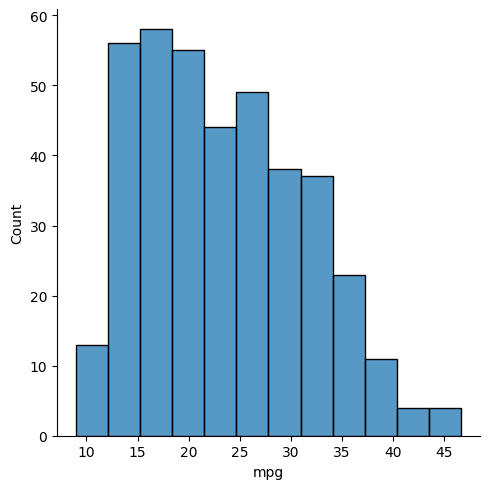

In [12]:
# Histogram showing the overall distribution of mpg
sns.displot(data = mpg, x = 'mpg')

<Axes: xlabel='origin', ylabel='mpg'>

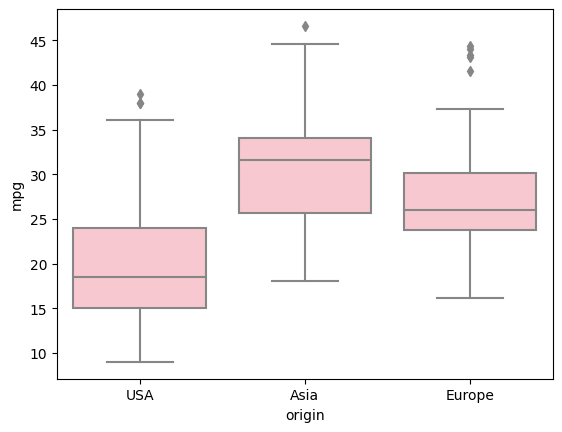

In [14]:
# Boxplot comparing the distribution of mpg across each level of origin
sns.boxplot(x = 'origin', y = 'mpg', data = mpg, color = 'pink')

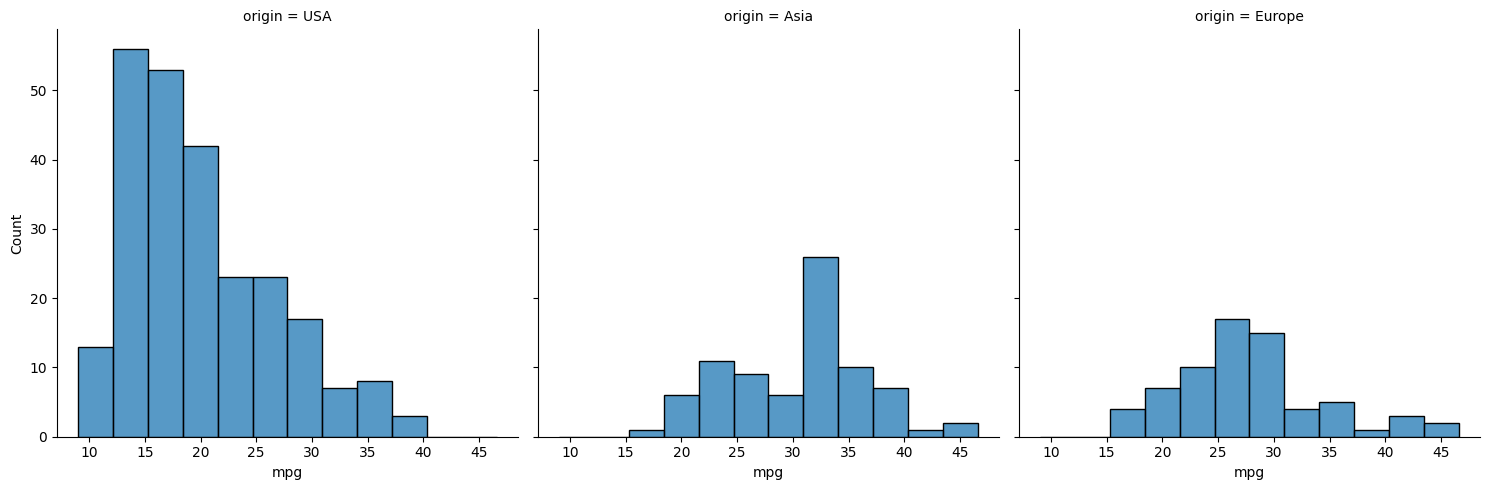

In [16]:
# Alternatively, this can be shown as a faceted histogram of mpg by origin
sns.displot(data = mpg, x = 'mpg', col = 'origin')

## Hypothesis Testing

In [18]:
# Difference in milage between American and European cars
# Apply filters for cars with origin equal to USA and Europe
usa_cars = mpg[mpg['origin'] == 'USA']
europe_cars = mpg[mpg['origin'] == 'Europe']

### Independent Samples T-test

In [19]:
stats.ttest_ind(usa_cars['mpg'], europe_cars['mpg'])

Ttest_indResult(statistic=-8.534455914399228, pvalue=6.306531719750568e-16)

#### *The p-value is less than 0.05, meaning that it is statistically significant. This suggests that there is strong evidence of difference between the mileage between American and European cars*

In [20]:
# Create correlation matrix
mpg[['mpg', 'horsepower', 'weight']].corr()

,mpg,horsepower,weight
mpg,1.000000,-0.778427,-0.832244
horsepower,-0.778427,1.000000,0.864538
weight,-0.832244,0.864538,1.000000


Text(0.5, 1.0, 'Relationship between weight and mpg')

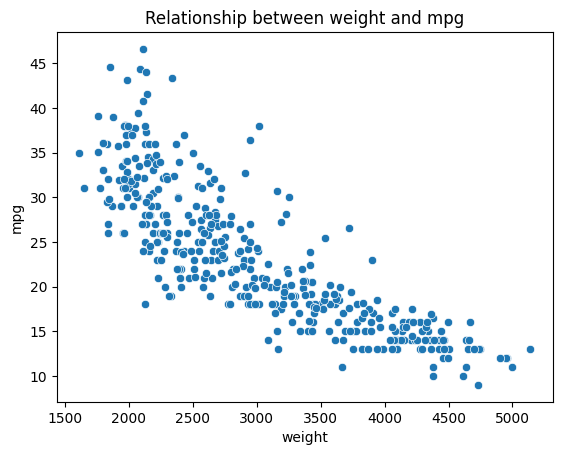

In [21]:
# Visualize the relationship between weight and mpg with a scatterplot
sns.scatterplot(x = 'weight', y = 'mpg', data = mpg)
plt.title('Relationship between weight and mpg')

#### *Weight and mileage are negatively correlated.*

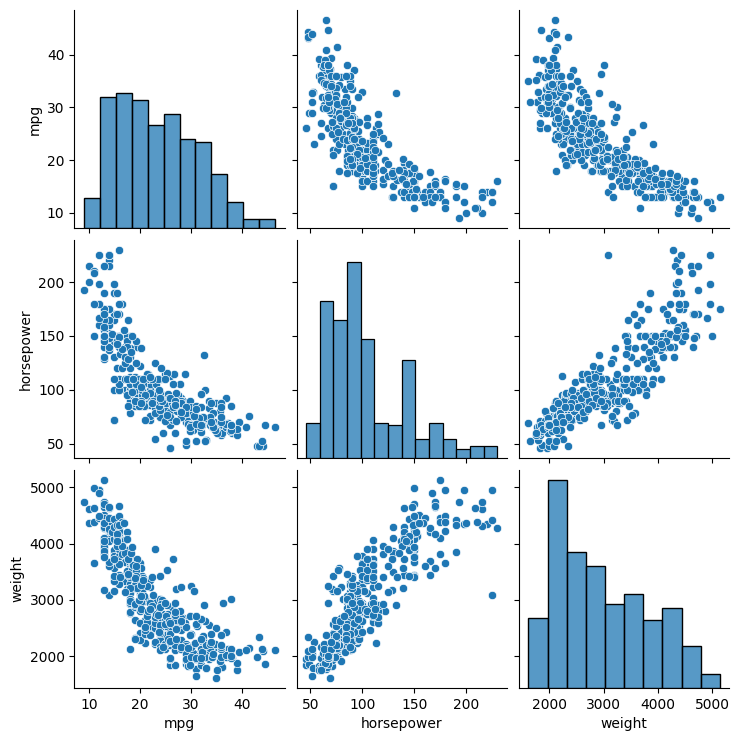

In [22]:
# Produce scatterplot and histogram across all pairs of our dataset
sns.pairplot(mpg[['mpg', 'horsepower', 'weight']])

## Linear Regression

In [23]:
# Linear regression of weight on mpg
stats.linregress(x = mpg['weight'], y = mpg['mpg'])

LinregressResult(slope=-0.007647342535779579, intercept=46.21652454901758, rvalue=-0.8322442148315754, pvalue=6.015296051435726e-102, stderr=0.00025796327827343185, intercept_stderr=0.7986724633128349)

Text(0.5, 1.0, 'Relationship between weight and mileage')

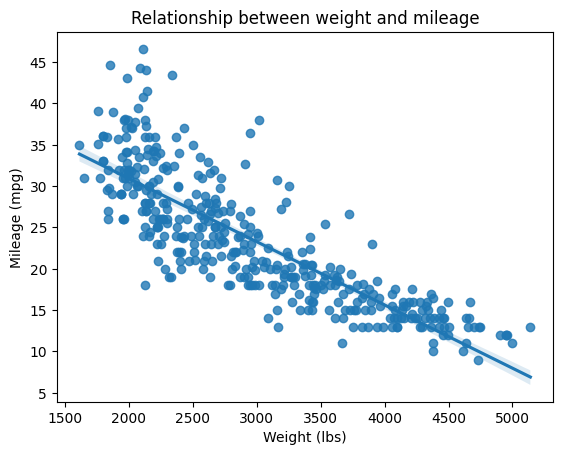

In [24]:
# Fit regression line to scatterplot
sns.regplot(x = 'weight', y = 'mpg', data = mpg)
plt.xlabel('Weight (lbs)')
plt.ylabel('Mileage (mpg)')
plt.title('Relationship between weight and mileage')

## Train/Test Split and Validation

In [25]:
# Split dataset into four DataFrames: 
# independent training (X_train), independent testing (X_test), 
# dependent training (y_train), and dependent testing (y_test)
X_train, X_test, y_train, y_test = model_selection.train_test_split(mpg[['weight']], mpg[['mpg']], random_state = 1234)

In [26]:
y_train.shape

(294, 1)

In [27]:
y_test.shape

(98, 1)

In [29]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Print first five observations
y_pred[:5]

array([[14.86634263],
       [23.48793632],
       [26.2781699 ],
       [27.69989655],
       [29.05319785]])

In [30]:
# Return the coefficient of the test model
regr.coef_

array([[-0.00760282]])

In [31]:
metrics.r2_score(y_test, y_pred)

0.6811923996681357

In [32]:
metrics.mean_squared_error(y_test, y_pred)

21.63348076436662